In [273]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [274]:
#df = pd.read_csv('../../data/telcom_numeric.csv')
df = pd.read_csv('../../data/telecom_pca.csv')
x = df.drop(columns=['TARGET'])
y = df['TARGET']

In [275]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 1)

In [276]:
random_forest = RandomForestClassifier(max_depth = 3, random_state = 1).fit(x_train, y_train)


In [277]:
y_pred = random_forest.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [278]:
random_forest.score(x_test, y_test)

0.9952621593471529

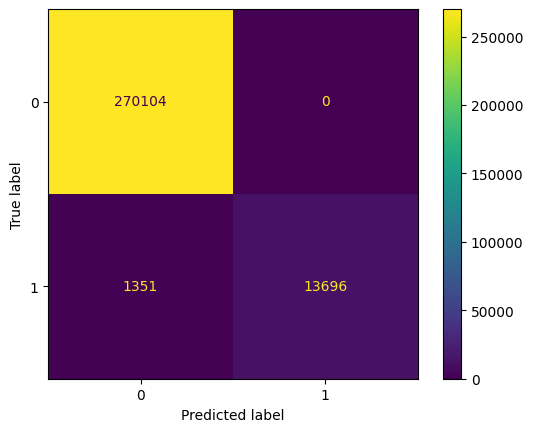

In [279]:
cm = confusion_matrix(y_test, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [280]:
a,b,c,d = cm.ravel()
(a,b,c,d)

(270104, 0, 1351, 13696)

In [281]:
percentage_A = a / (a + b) #True positives = True positives / (True positives + false positives)
percentage_D = d / (d + c) #True positives = True negatives / (True negatives + false negatives)
print("Precission in true positives (A):",percentage_A," Precission in true negatives (D):",percentage_D)

Precission in true positives (A): 1.0  Precission in true negatives (D): 0.9102146607297136


In [282]:
#function to get all clients churn probability: 0 means no churn, 1 means churn
def getChurnProbabilities(random_forest, x):
    return random_forest.predict_proba(x)

In [283]:
proba_matrix = getChurnProbabilities(random_forest, x_test)

In [284]:
#function to set each client according to low, mid or high churn chance (given low and high percentages by the user)
def showProbabilities(low,high):
    clients_low = []
    clients_mid = []
    clients_high = []
    i = 0
    #for each client in the data set
    for client in proba_matrix:
        #get all their data and their churn chance into one list
        client_index = x_test.index[i]
        client_info = x_test.loc[client_index].values
        client_info = np.append(client_info,client[1])
        #store client data into profiles(low, mid, high) list
        if client[1] <= low:
            clients_low.append(client_info)
        elif client[1] >= high:
            clients_high.append(client_info)
        else:
            #everything between lo and high percentages goes to mid chance list
            clients_mid.append(client_info)
        i += 1
    return clients_low, clients_mid, clients_high


In [285]:
clients_low, clients_mid, clients_high = showProbabilities(.30,.60)

In [286]:
print(len(clients_low), " clients have low churn chances")
print(len(clients_mid), " clients have mid churn chances")
print(len(clients_high), " clients have high churn chances")

270104  clients have low churn chances
14930  clients have mid churn chances
117  clients have high churn chances


In [287]:
#function to get each groups relevance in terms of bill amount by getting the sum of a determined group
def getClassificationSum(churn_group):
    names = x_test.columns.to_list()
    names[0] = "CUSTOMER_ID"
    names.append('CHURN_PERCENTAGE')
    clients_high_pd = pd.DataFrame(churn_group, columns = names)
    churn_bill_value = clients_high_pd['BILL_AMOUNT'].sum()
    return churn_bill_value

In [288]:
low_value = getClassificationSum(clients_low)
mid_value = getClassificationSum(clients_mid)
high_value = getClassificationSum(clients_high)

In [289]:
print("Bill amount for clients with low churn chances: ", low_value)
print("Bill amount for clients with mid churn chances: ", mid_value)
print("Bill amount for clients with high churn chances: ", high_value)

Bill amount for clients with low churn chances:  104599751.21089183
Bill amount for clients with mid churn chances:  4357886.30478707
Bill amount for clients with high churn chances:  2454.588149720983
